In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import roc_auc_score
from time import time
import matplotlib.pyplot as plt

In [2]:
transactions = pd.read_csv('data/transactions.csv')

genders = pd.read_csv('data/train.csv', encoding = "utf-8")
genders = genders.drop('Unnamed: 0', axis = 1)

trans_types = pd.read_csv('data/trans_types.csv', encoding = "utf-8", sep=';')

mcc_codes = pd.read_csv('data/mcc_codes.csv', sep=';')

In [3]:
transactions.head(5)

,client_id,trans_time,mcc_code,trans_type,amount,term_id,trans_city
0,d1bbbc9a0e0410d3cf12a3d2f44f3450,35 08:24:41,4829,2370,-1808.56,NaN,Tver
1,81c7349f7bdcb661bc7d5f5f0fdac6aa,351 13:27:15,6011,7010,7954.51,442207,Kazan
2,fc0c7c937f139bd6d1c5b5d0a0023dd3,150 16:03:59,6011,2010,-12293.56,NaN,Khabarovsk
3,3495487d5beaa5caaa0682fddc38379a,373 11:54:12,6010,7070,49.52,888987,Kaliningrad
4,07e279042b1da23710fa2f65034d30b9,340 13:11:45,6010,7070,45.29,888918,Saint Petersburg


In [4]:
print('duplicated values of transactions:', transactions.duplicated().sum())
print('-'*30)
print('null values of transactions:\n', transactions.isnull().sum())
print('-'*30)
print('null values of mcc codes:\n', mcc_codes.isnull().sum())
print('-'*30)
print('null values of transactions types:\n', trans_types.isnull().sum())

duplicated values of transactions: 4
------------------------------
null values of transactions:
 client_id           0
trans_time          0
mcc_code            0
trans_type          0
amount              0
term_id       1443778
trans_city          0
dtype: int64
------------------------------
null values of mcc codes:
 mcc_code           0
mcc_description    0
dtype: int64
------------------------------
null values of transactions types:
 trans_type           0
trans_description    0
dtype: int64


In [5]:
transactions['mcc_code'].value_counts()

mcc_code
6011    772549
4814    521102
5411    512295
6010    479323
4829    314746
         ...  
7629        30
8244        29
5697        23
2741        22
6513        14
Name: count, Length: 184, dtype: int64

In [6]:
transactions['trans_type'].value_counts()

trans_type
1010    850980
2010    553922
1030    512696
1110    490488
7070    323669
         ...  
4200         8
8146         5
4045         4
1510         4
4035         2
Name: count, Length: 75, dtype: int64

In [7]:
def apply_log(x):
    if x > 0:
        return np.log(1+x)
    return -np.log(1-x)

transactions['amount_log'] = transactions['amount'].apply(apply_log)

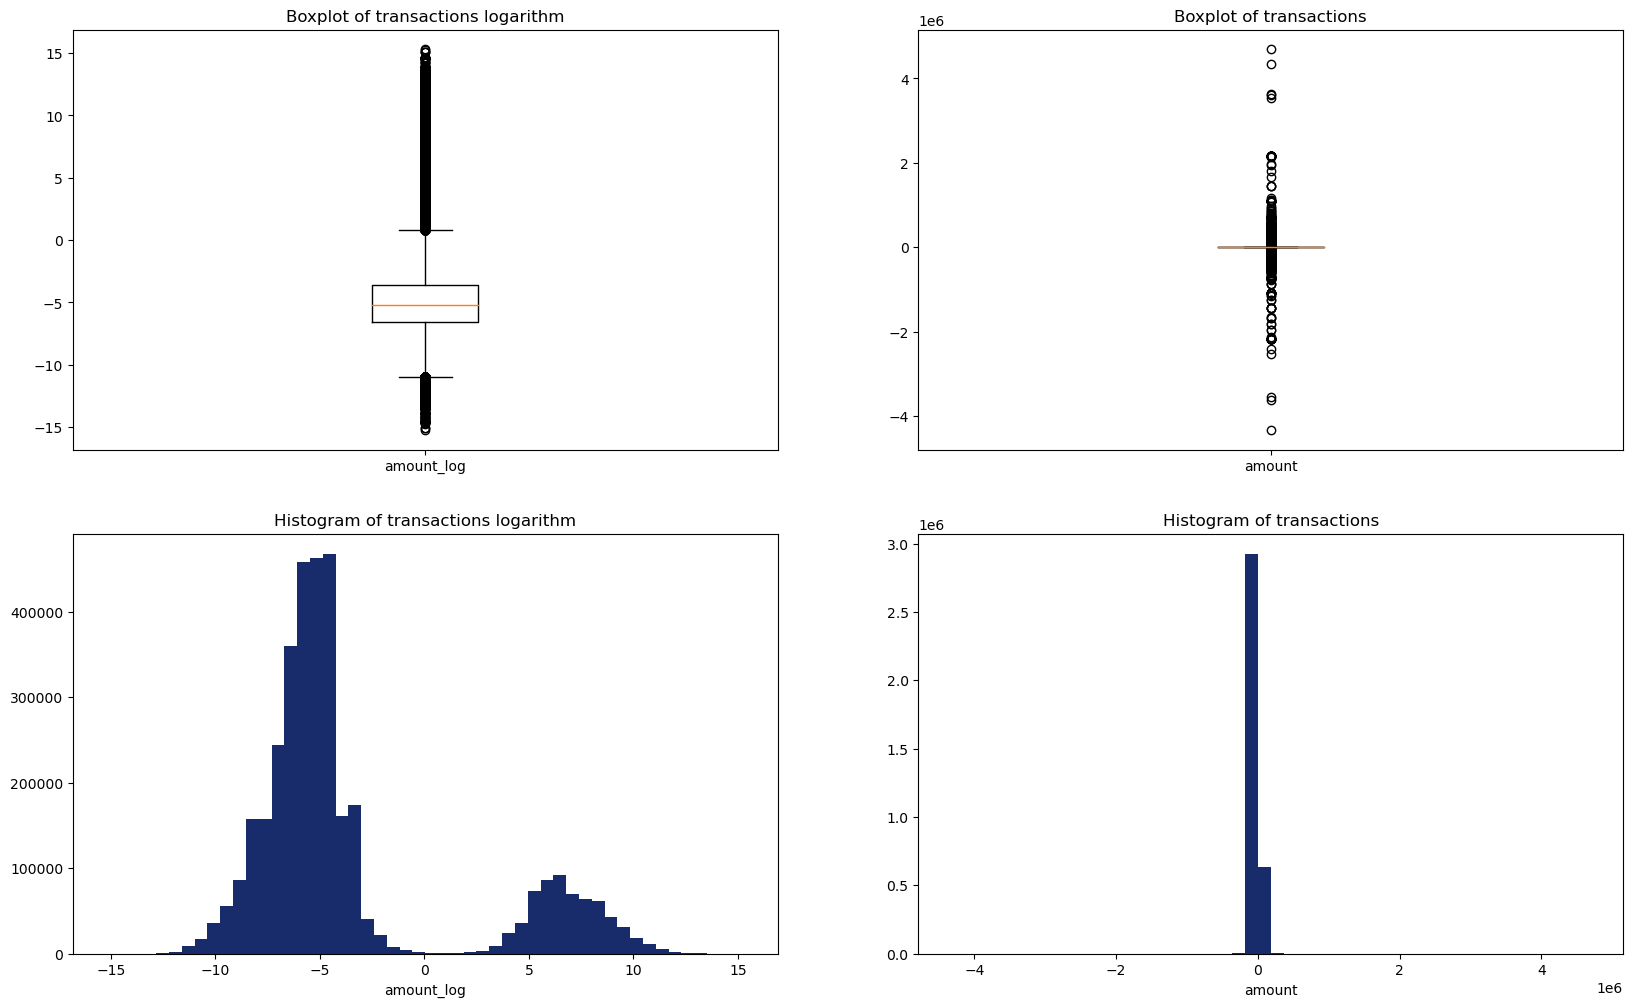

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes[0][0].set_title('Boxplot of transactions logarithm')
labels = ['amount_log']
axes[0][0].boxplot(transactions['amount_log'], labels=labels)

axes[0][1].set_title('Boxplot of transactions')
labels = ['amount']
axes[0][1].boxplot(transactions['amount'], labels=labels)

axes[1][0].set_title('Histogram of transactions logarithm')

axes[1][0].hist(transactions['amount_log'], bins=50, label = 'amount_log', color = '#182c6bff')
axes[1][0].set_xlabel('amount_log')

axes[1][1].set_title('Histogram of transactions')

axes[1][1].hist(transactions['amount'], bins=50, label = 'amount', color = '#182c6bff')
axes[1][1].set_xlabel('amount')

plt.show()

In [9]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    return df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

data_with_no_outliers=remove_outlier_IQR(transactions['amount_log'])

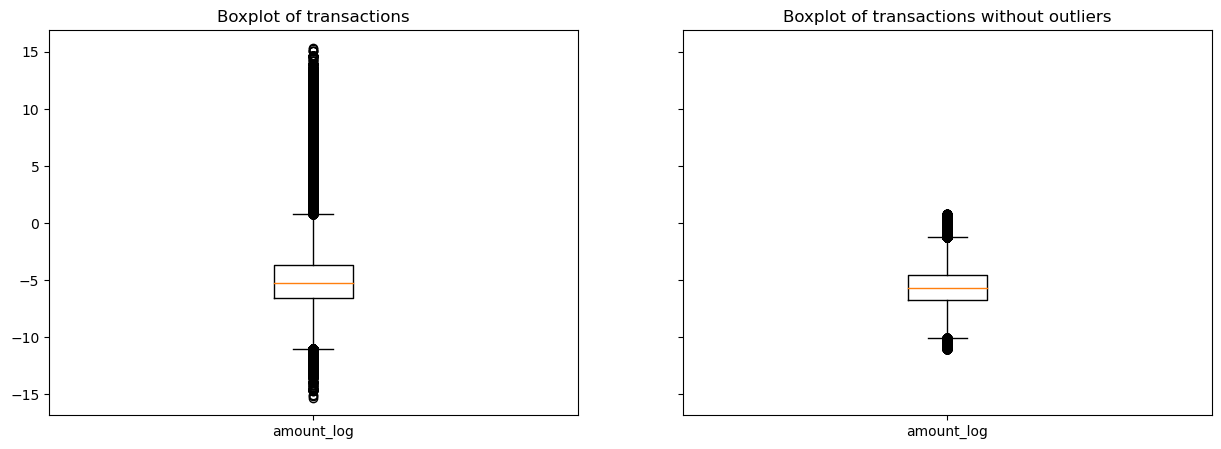

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

axes[0].set_title('Boxplot of transactions')

labels = ['amount_log']
axes[0].boxplot(transactions['amount_log'], labels=labels)
axes[1].set_title('Boxplot of transactions without outliers')
axes[1].boxplot(data_with_no_outliers, labels=labels)

plt.show()

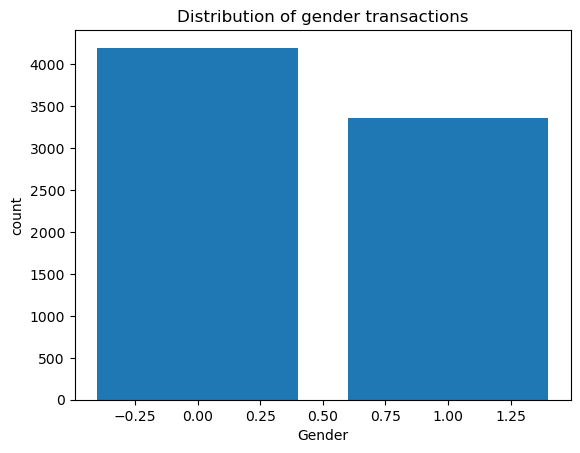

In [11]:
values = genders['gender'].value_counts()
plt.bar(values.index, values.values)

plt.title('Distribution of gender transactions')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

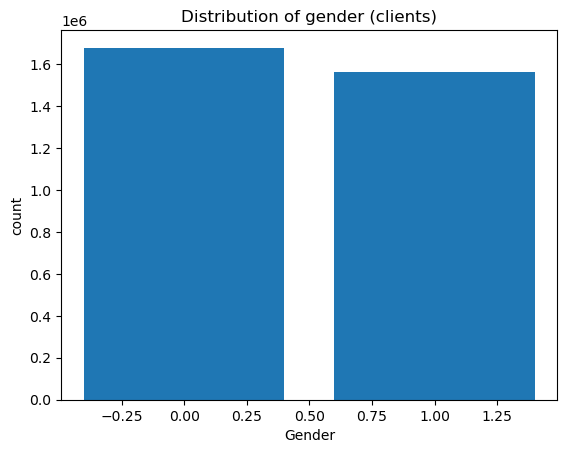

In [12]:
values = pd.merge(transactions, genders, on='client_id', how='inner')['gender'].value_counts()


plt.bar(values.index, values.values)

plt.title('Distribution of gender (clients)')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()